# Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [4]:
dataset = pd.read_csv('Position_Salaries.csv')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [6]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


#Split Data

In [16]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
dataset


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [18]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [19]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

#Build Model

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train) # traing
y_pred =model.predict(x_train) # testing

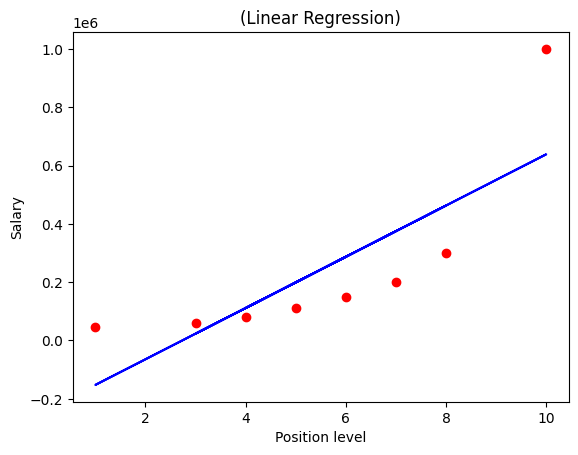

In [25]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, y_pred, color = 'blue')
plt.title('(Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

#Evaluation

In [26]:
y_predtest=model.predict(x_test)

In [28]:
# calculate Mean square error
MSE = mean_squared_error(y_train,y_pred)

# calculate ROOT Mean square error
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))

# calculate  Mean absolute error
MAE=mean_absolute_error(y_train, y_pred)

# Calculate R square vale
rsq = r2_score(y_train,y_pred)

print('mean squared error :',MSE)
print('Root mean squared error :',RMSE)
print('mean absolute error :',MAE)
print('r square :',rsq)

mean squared error : 31967268318.965515
Root mean squared error : 178793.92696332143
mean absolute error : 148836.2068965517
r square : 0.6366049276570868


In [29]:
# calculate Mean square error
MSE = mean_squared_error(y_test,y_predtest)

# calculate ROOT Mean square error
RMSE = np.sqrt(mean_squared_error(y_test, y_predtest))

# calculate  Mean absolute error
MAE=mean_absolute_error(y_test, y_predtest)

# Calculate R square vale
rsq = r2_score(y_test,y_predtest)

print('mean squared error :',MSE)
print('Root mean squared error :',RMSE)
print('mean absolute error :',MAE)
print('r square :',rsq)

mean squared error : 7840057409.334131
Root mean squared error : 88544.09867029045
mean absolute error : 82607.75862068967
r square : 0.8451346684575974


# The fitting model is not good because a data in a polynomial shape and we used a simple leaner regression

#Polynomial Regression

1- first put the data in polynomial shape(raise exponent ).

2- apply linear regression .

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)

model_2 = LinearRegression()
model_2.fit(X_poly, y)
y_poly_pred = model_2.predict(X_poly)

In [37]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

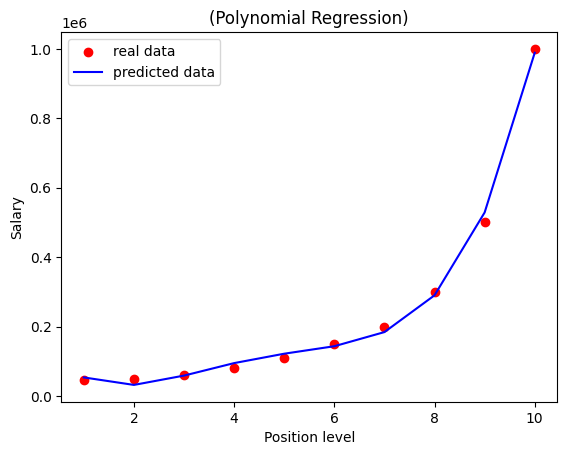

In [35]:
plt.scatter(X, y, color = 'red',label='real data')
plt.plot(X, X_poly_pred, color = 'blue',label='predicted data')
plt.title('(Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [41]:
# calculate Mean square error
MSE = mean_squared_error(y,y_poly_pred)

# calculate ROOT Mean square error
RMSE = np.sqrt(mean_squared_error(y, y_poly_pred))

# calculate  Mean absolute error
MAE=mean_absolute_error(y, y_poly_pred)

# Calculate R square vale
rsq = r2_score(y,y_poly_pred)

print('mean squared error :',MSE)
print('Root mean squared error :',RMSE)
print('mean absolute error :',MAE)
print('r square :',rsq)

mean squared error : 210343822.84381685
Root mean squared error : 14503.234909626777
mean absolute error : 12681.818181828514
r square : 0.9973922891706614
